<a href="https://colab.research.google.com/github/karsakami/Machine-Learning-Case-Studies/blob/main/Naive_Bayes%20in%20medical%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pyforest

In [11]:
data = pd.read_csv('diabetes.csv')

<IPython.core.display.Javascript object>

In [12]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We plot a histogram, distribution of the data, so we have to exclude the target value $y$. 

Purpose of this is to see the missing values, they can appear as zeros

List function return a column names of data, we slice from o to last.

There are a lot zeros in the columns, for example Skin Thickness, BloodPresure, BMI

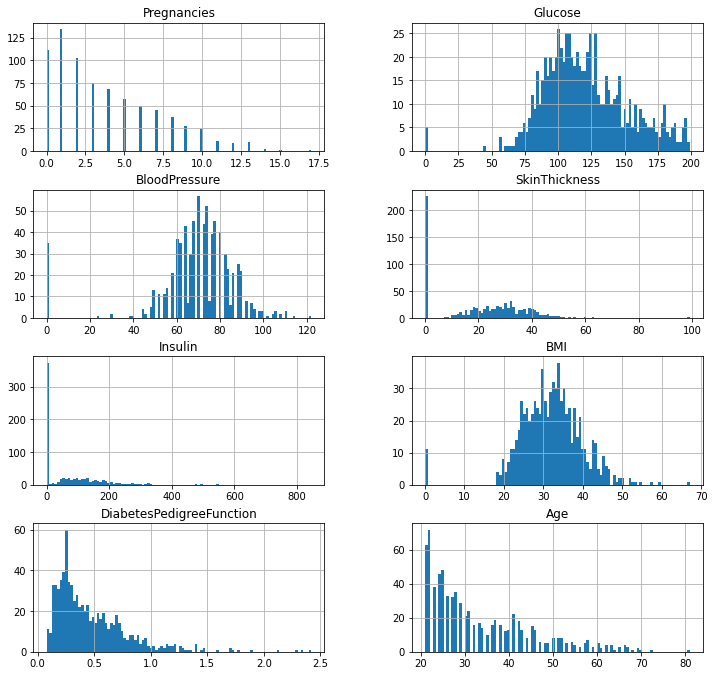

In [16]:
columns = list(data)[0:-1]
data[columns].hist(bins=100, figsize=(12,30), layout=(10,2));

# Splitting the data

In [17]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [19]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


Lets replace zero with mean with SimpleImputer

In [20]:
rep_0 = SimpleImputer(missing_values=0, strategy='mean')

cols = x_train.columns #save this columns because function will remove this

x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We dont have column because of the function

In [21]:
x_train.head(10)

,0,1,2,3,4,5,6,7
0,15.000000,136.0,70.0,32.000000,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.000000,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.000000,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.000000,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.000000,158.243346,35.2,0.197,29.0
5,1.000000,143.0,84.0,23.000000,310.000000,42.4,1.076,22.0
6,9.000000,124.0,70.0,33.000000,402.000000,35.4,0.282,34.0
7,6.000000,147.0,80.0,28.672131,158.243346,29.5,0.178,50.0
8,6.000000,129.0,90.0,7.000000,326.000000,19.6,0.582,60.0
9,3.000000,130.0,78.0,23.000000,79.000000,28.4,0.323,34.0


Getting columns again

In [22]:
x_train.columns = cols
x_test.columns = cols

They are here again

In [23]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,15.000000,136.0,70.0,32.000000,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.000000,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.000000,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.000000,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.000000,158.243346,35.2,0.197,29.0
...,...,...,...,...,...,...,...,...
532,2.000000,157.0,74.0,35.000000,440.000000,39.4,0.134,30.0
533,7.000000,187.0,50.0,33.000000,392.000000,33.9,0.826,34.0
534,13.000000,126.0,90.0,28.672131,158.243346,43.4,0.583,42.0
535,4.000000,171.0,72.0,28.672131,158.243346,43.6,0.479,26.0


## Building Naive Bayes algorithm

**Gaussian** - normal distribution

**Overfitting** - when data (fitting = learning) will get used too much to training data, and perform bad on test data

**Underfitting** - when model perform bad on training data and test data

In [24]:
from sklearn.naive_bayes import GaussianNB

model_ = GaussianNB()

model_.fit(x_train, y_train)

GaussianNB()

In [25]:
train_prediction = model_.predict(x_train)
train_prediction 

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

How accurate model is? Lets see this by comparing predicted and true values. Lets remember that we tested this prediction on training data, so we can divide this predictions and true data.

In [26]:
metrics.accuracy_score(y_train, train_prediction)

<IPython.core.display.Javascript object>

0.7392923649906891

Now lets use test data

In [27]:
test_predict = model_.predict(x_test)
test_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

Checking accuracy score on test data

In [28]:
metrics.accuracy_score(y_test, test_predict)

<IPython.core.display.Javascript object>

0.7705627705627706